<a href="https://colab.research.google.com/github/Victor-A-Orlov/nn-study/blob/main/nn_study_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.15)

In [3]:
def relu(x):
    return np.max([np.zeros_like(x), x], axis=0)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu_derivative(x):
    return np.array(x > 0, dtype='float')

def sigmoid_derivative(x):
    return sigmoid(x)*(1 - sigmoid(x))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

In [4]:
class Layer:
    def __init__(self, input_size, output_size):
        self.w = np.random.normal(size=(input_size, output_size))
        self.b = np.random.normal(size=(1, output_size))
        self.input = np.zeros(input_size)
        
    def forward(self, x):
        self.input = x
        y = np.dot(x, self.w) + self.b
        self.output = y
        return self.output
    
    def backward(self, out_grad, lr=0.1):
        in_grad = np.dot(out_grad, self.w.T)
        w_grad = np.dot(self.input.T, out_grad)
        b_grad = out_grad
        
        self.w = self.w - lr * w_grad
        self.b -= lr * b_grad
        return in_grad

In [5]:
class ReLU:
    def forward(self, input):
        self.input = input
        return relu(input)
    
    def backward(self, out_grad):
        return out_grad * relu_derivative(self.input)
    
class Sigmoid:
    def forward(self, input):
        self.input = input
        return sigmoid(input)
    
    def backward(self, out_grad):
        return out_grad * sigmoid_derivative(self.input)

In [6]:
class NeuralNetwork:
    def __init__(self):
        self.l1 = Layer(2,3)
        self.a1 = ReLU()
        self.l2 = Layer(3,1)
        self.a2 = Sigmoid()
        
    def forward(self, x):
        # out = x.reshape(1,-1)
        out = self.l1.forward(x)
        out = self.a1.forward(out)
        out = self.l2.forward(out)
        out = self.a2.forward(out)
        return out
        
    def fit(self, X, y, epochs=50):
        epoch = 0
        history = []
        for epoch in range(epochs):
            squared_error = 0
            for x, y_true in zip(X, y):
                # Прямой проход
                x = x.reshape(1,-1)
                out = self.forward(x)
                
                # Обратный проход
                out_grad = mse_derivative(y_true, out)
                out_grad = self.a2.backward(out_grad)
                out_grad = self.l2.backward(out_grad)
                out_grad = self.a1.backward(out_grad)
                out_grad = self.l1.backward(out_grad)
                
                # Квадрат ошибки
                squared_error = squared_error + (out - y_true)**2
                
            mean_squared_error = (squared_error/y.size).item()
            history.append(mean_squared_error)
            print('Epoch: ', epoch, ' Loss: ', mean_squared_error)
        return history

In [7]:
nn = NeuralNetwork()
history = nn.fit(X_train, y_train)

Epoch:  0  Loss:  0.5491957340701086
Epoch:  1  Loss:  0.5249476250186927
Epoch:  2  Loss:  0.4811430864869051
Epoch:  3  Loss:  0.39406708967579457
Epoch:  4  Loss:  0.24474058696624112
Epoch:  5  Loss:  0.09909904256908225
Epoch:  6  Loss:  0.035533157077535536
Epoch:  7  Loss:  0.018568636888584164
Epoch:  8  Loss:  0.012693669326272741
Epoch:  9  Loss:  0.009990407842331399
Epoch:  10  Loss:  0.008347510840607714
Epoch:  11  Loss:  0.007257845836089451
Epoch:  12  Loss:  0.006468620179201632
Epoch:  13  Loss:  0.005856485256396369
Epoch:  14  Loss:  0.0053596121612496566
Epoch:  15  Loss:  0.004943652555006391
Epoch:  16  Loss:  0.0045878254253727095
Epoch:  17  Loss:  0.004288381088729258
Epoch:  18  Loss:  0.004015904200724186
Epoch:  19  Loss:  0.003773368775761169
Epoch:  20  Loss:  0.0035560963051851175
Epoch:  21  Loss:  0.0033603826475461763
Epoch:  22  Loss:  0.003183236807306375
Epoch:  23  Loss:  0.0030222061608388908
Epoch:  24  Loss:  0.002871311810176487
Epoch:  25  Lo

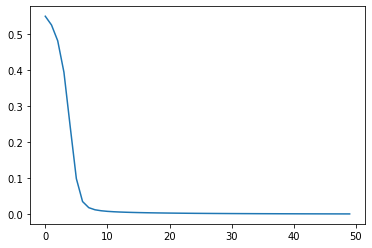

In [8]:
plt.plot(history)

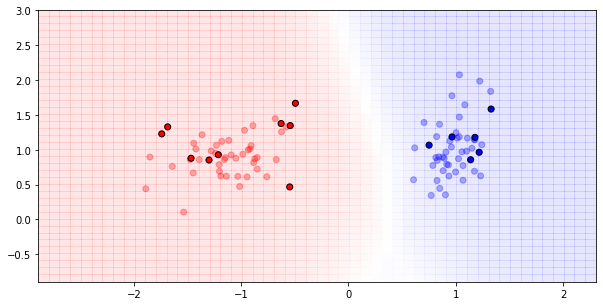

In [9]:
# Визуализация

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
x_mesh = np.c_[xx1.ravel(), xx2.ravel()]
Z = nn.forward(x_mesh)
Z = Z.reshape(xx1.shape)

plt.figure(figsize=(10,5))
plt.pcolormesh(xx1, xx2, Z, alpha=0.1, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', edgecolors='black')

Чёрным обведены точки, которые были в обучающей выборке